In [1]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
mass_shootings_2018_file = "Resources/new-2018-mass-shootings.csv"
mass_shootings_2018_df = pd.read_csv(mass_shootings_2018_file)
mass_shootings_2018_df.head()

,Id,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2018-1,31-Dec-18,Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,2018-2,29-Dec-18,Ohio,Lima,904 S Main St,1,3,NaN
2,2018-3,28-Dec-18,Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
3,2018-4,24-Dec-18,Louisiana,Lutcher,2176 Main St,2,2,NaN
4,2018-5,23-Dec-18,Missouri,Springfield,1042 W College St,1,6,NaN


In [3]:
mass_shootings_2019_file = "Resources/new-2019-mass-shootings.csv"
mass_shootings_2019_df = pd.read_csv(mass_shootings_2019_file)
mass_shootings_2019_df.head()

,Id,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,2019-1,29-Dec-19,Illinois,Danville,1803 block of Westview Ave,0,5,NaN
1,2019-2,29-Dec-19,New York,Buffalo,50 block of Henrietta Ave,1,3,NaN
2,2019-3,29-Dec-19,California,Ceres,800 block of Allacante Dr,0,5,NaN
3,2019-4,27-Dec-19,California,Modesto,1900 block of Vernon Ave,1,3,NaN
4,2019-5,27-Dec-19,Georgia,Kennesaw,1575 Ridenour Pkwy NW,0,4,NaN


In [4]:
#Create a filtered dataframe from specific columns
# Delete extraneous columns
del mass_shootings_2019_df['Address']
del mass_shootings_2019_df['Operations']
mass_shootings_2019_df.head()              

,Id,Incident Date,State,City Or County,# Killed,# Injured
0,2019-1,29-Dec-19,Illinois,Danville,0,5
1,2019-2,29-Dec-19,New York,Buffalo,1,3
2,2019-3,29-Dec-19,California,Ceres,0,5
3,2019-4,27-Dec-19,California,Modesto,1,3
4,2019-5,27-Dec-19,Georgia,Kennesaw,0,4


In [5]:
#Create a filtered dataframe from specific columns
# Delete extraneous columns
del mass_shootings_2018_df['Address']
del mass_shootings_2018_df['Operations']
mass_shootings_2018_df.head()  

,Id,Incident Date,State,City Or County,# Killed,# Injured
0,2018-1,31-Dec-18,Ohio,Cleveland,3,2
1,2018-2,29-Dec-18,Ohio,Lima,1,3
2,2018-3,28-Dec-18,Missouri,Saint Charles,4,1
3,2018-4,24-Dec-18,Louisiana,Lutcher,2,2
4,2018-5,23-Dec-18,Missouri,Springfield,1,6


In [6]:
# Rename columns
mass_shootings_2018_columns = ["Id", "Incident Date", "State", "City Or County", "# Killed", "# Injured"]
mass_shootings_2018_transformed = mass_shootings_2018_df[mass_shootings_2018_columns].copy()
mass_shootings_2018_transformed = mass_shootings_2018_transformed.rename(columns={"Id": "id",
                                                                                 "Incident Date":"incident_date",
                                                                                 "State":"states",
                                                                                 "City Or County":"locations",
                                                                                 "# Killed":"killed_2018",
                                                                                 "# Injured":"injured_2018"})  
# Set Index
mass_shootings_2018_transformed.set_index("states", inplace=True)

mass_shootings_2018_transformed.head()



,id,incident_date,locations,killed_2018,injured_2018
states,,,,,
Ohio,2018-1,31-Dec-18,Cleveland,3,2
Ohio,2018-2,29-Dec-18,Lima,1,3
Missouri,2018-3,28-Dec-18,Saint Charles,4,1
Louisiana,2018-4,24-Dec-18,Lutcher,2,2
Missouri,2018-5,23-Dec-18,Springfield,1,6


In [7]:
# Rename columns
mass_shootings_2019_columns = ["Id", "Incident Date", "State", "City Or County", "# Killed", "# Injured"]
mass_shootings_2019_transformed = mass_shootings_2019_df[mass_shootings_2019_columns].copy()
mass_shootings_2019_transformed = mass_shootings_2019_transformed.rename(columns={"Id": "id",
                                                                                 "Incident Date":"incident_date",
                                                                                 "State":"states",
                                                                                 "City Or County":"locations",
                                                                                 "# Killed":"killed_2019",
                                                                                 "# Injured":"injured_2019"})  
# Set Index
mass_shootings_2019_transformed.set_index("states", inplace=True)

mass_shootings_2019_transformed.head()




,id,incident_date,locations,killed_2019,injured_2019
states,,,,,
Illinois,2019-1,29-Dec-19,Danville,0,5
New York,2019-2,29-Dec-19,Buffalo,1,3
California,2019-3,29-Dec-19,Ceres,0,5
California,2019-4,27-Dec-19,Modesto,1,3
Georgia,2019-5,27-Dec-19,Kennesaw,0,4


In [8]:
connection_string = "suevalverde:@localhost:5432/GunViolenceDb"
engine = create_engine(f'postgresql://{connection_string}')


In [9]:
engine.table_names()


['mass_shootings_2018', 'mass_shootings_2019']

In [10]:
mass_shootings_2018_transformed.to_sql(name='mass_shootings_2018', con=engine, if_exists='replace', index=True)

In [11]:
mass_shootings_2019_transformed.to_sql(name='mass_shootings_2019', con=engine, if_exists='replace', index=True)

In [12]:
pd.read_sql_query('select * from mass_shootings_2018', con=engine).head()

,states,id,incident_date,locations,killed_2018,injured_2018
0,Ohio,2018-1,31-Dec-18,Cleveland,3,2
1,Ohio,2018-2,29-Dec-18,Lima,1,3
2,Missouri,2018-3,28-Dec-18,Saint Charles,4,1
3,Louisiana,2018-4,24-Dec-18,Lutcher,2,2
4,Missouri,2018-5,23-Dec-18,Springfield,1,6


In [13]:
pd.read_sql_query('select * from mass_shootings_2019', con=engine).head()

,states,id,incident_date,locations,killed_2019,injured_2019
0,Illinois,2019-1,29-Dec-19,Danville,0,5
1,New York,2019-2,29-Dec-19,Buffalo,1,3
2,California,2019-3,29-Dec-19,Ceres,0,5
3,California,2019-4,27-Dec-19,Modesto,1,3
4,Georgia,2019-5,27-Dec-19,Kennesaw,0,4


In [14]:
mass_shootings_merged = """
SELECT mass_shootings_2018.states, sum(mass_shootings_2018.killed_2018) as killed_2018, 
sum(mass_shootings_2018.injured_2018) as injured_2018,  
sum(mass_shootings_2019.killed_2019) as killed_2019, sum(mass_shootings_2019.injured_2019) as injured_2019
FROM mass_shootings_2018
LEFT JOIN mass_shootings_2019
ON mass_shootings_2018.states = mass_shootings_2019.states
GROUP BY mass_shootings_2018.states
"""
Final_table=pd.read_sql_query(mass_shootings_merged , con=engine)
Final_table.set_index("states", inplace=True)
Final_table

,killed_2018,injured_2018,killed_2019,injured_2019
states,,,,
Nevada,9.0,45.0,4.0,48.0
South Carolina,50.0,190.0,40.0,168.0
New Mexico,25.0,20.0,16.0,36.0
Arkansas,35.0,85.0,18.0,120.0
Washington,16.0,36.0,24.0,36.0
Kentucky,35.0,125.0,24.0,72.0
Nebraska,1.0,16.0,0.0,12.0
Tennessee,133.0,476.0,54.0,558.0
Alabama,144.0,660.0,238.0,658.0


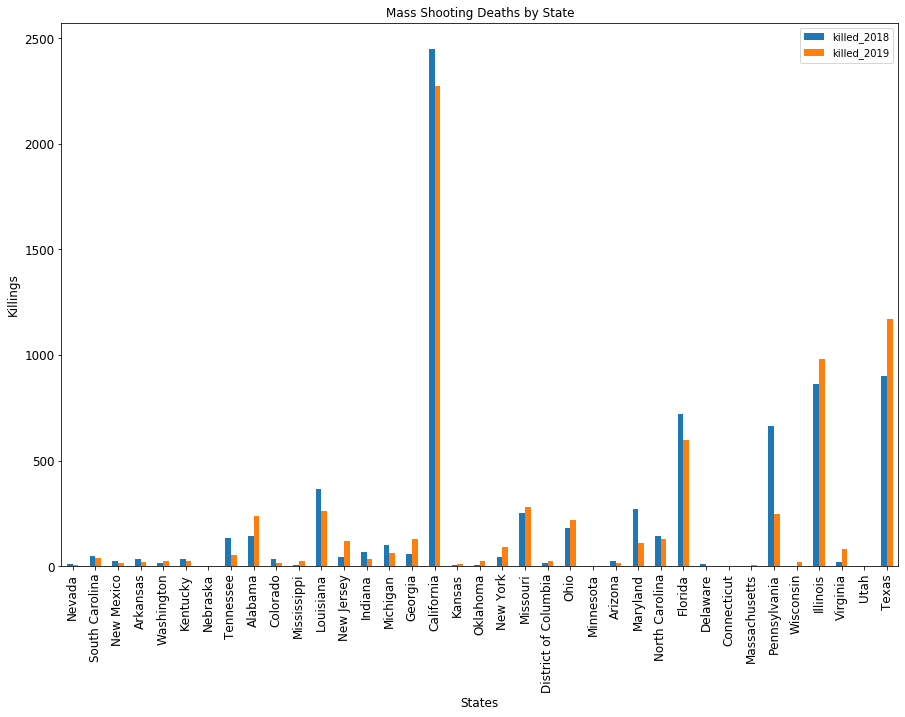

In [15]:
ax = Final_table[['killed_2018','killed_2019']].plot(kind='bar', title ='Mass Shooting Deaths by State',
figsize = (15,10), legend=True, fontsize=12)
ax.set_xlabel('States', fontsize=12)
ax.set_ylabel('Killings', fontsize=12)
plt.show()